In [50]:
import numpy as np
from graph_tool.all import *

# 1. Plot only natural sequences

In [51]:
mmseqs2_results = open('/agh/projects/noelia/NLP/zymCTRL/networks/2.network_selected/alnRes.m8')
# obtained doing mmseqs easy-search finalfile.fasta finalfile.fasta alnRes.m8 tmp

In [52]:
def get_threshold_identity(col):
    """ get the identity in the hssp curve for a certain length"""
    col = float(col)
    identity=0
    if col <= 11:
        identity = 100
    elif col > 11 and col <= 451:
        identity = 480*col**(-0.32*(1+np.exp(-col/1000)))
    elif col > 451:
        identity = 19.5
    return identity    

In [53]:
total_hits = []
for line in mmseqs2_results:
    query, sbjct, ident, col = line.split()[:4]
    if query == sbjct:
        continue
        
    if float(ident)*100 > get_threshold_identity(col):
        total_hits.append((query, sbjct, ident))
        
mmseqs2_results.close()

In [55]:
len(total_hits)

238944

In [57]:
unique_hits = np.unique([(x[0],x[1]) for x in total_hits])

In [63]:
unique_hits

array(['1.-.-.-_0.fasta', '1.-.-.-_1.fasta', '1.1.-.-_0.fasta', ...,
       '7.6.2.8_1.fasta', '7.6.2.9_0.fasta', '7.6.2.9_1.fasta'],
      dtype='<U19')

In [69]:
vertex

'7.6.2.9_1.fasta'

In [70]:
g = Graph()
g.set_directed(False)
g.vp.name = g.new_vertex_property("string")
g.ep.ident = g.new_edge_property("float")
g.vp.color = g.new_vertex_property("string")

for vertex in unique_hits:
    v1 = g.add_vertex()
    g.vp.name[v1] = vertex
    g.vp.color[v1] = palette[vertex.split('.')[0]]
    

In [71]:
for hit in total_hits:
    v1 = find_vertex(g, g.vp.name, hit[0])[0]
    v2 = find_vertex(g, g.vp.name, hit[1])[0]
    ae = g.edge(v1, v2)
    if not ae:
        ae = g.add_edge(v1, v2)
        g.ep.ident[ae] = float(hit[2])*100

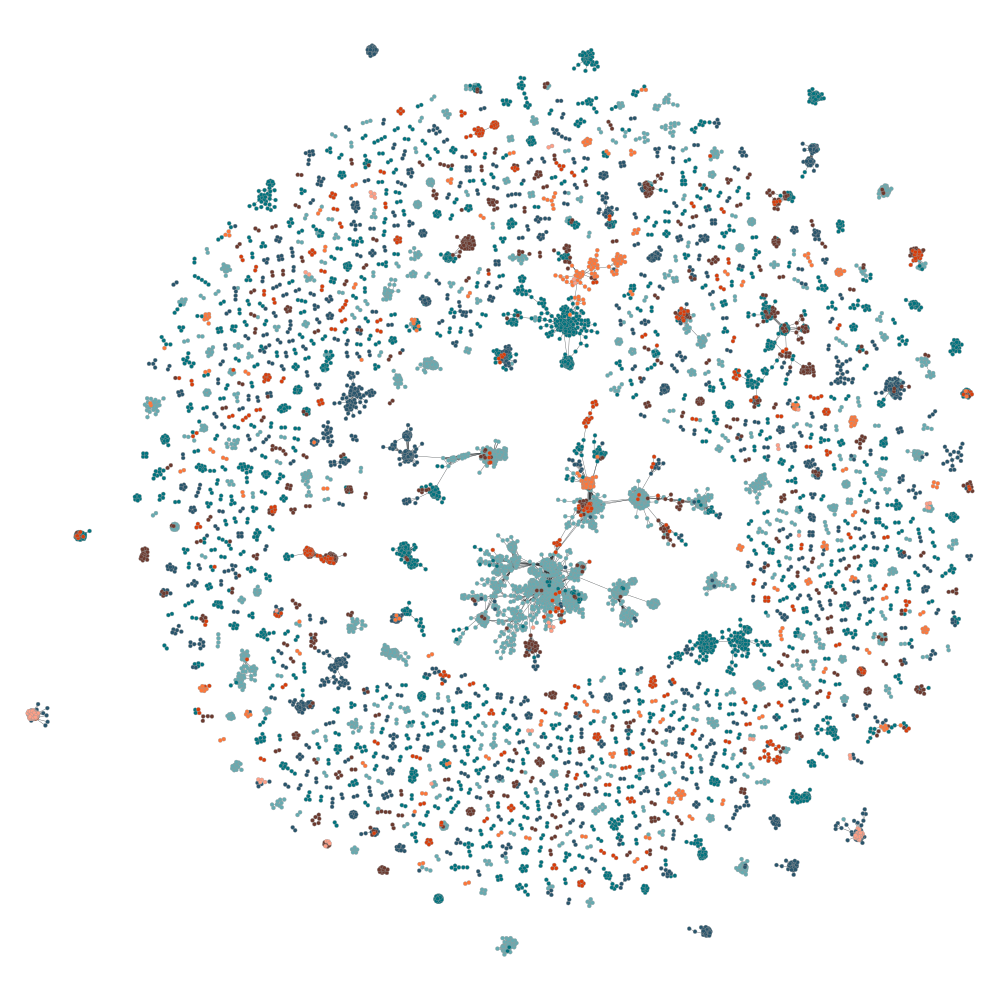

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc9ef924908, at 0x7fc9ef91d630>

In [78]:
graph_draw(g, vertex_fill_color=g.vertex_properties['color'], vertex_size=4,output_size=(1000, 1000))

In [68]:
palette = {"1":"#66ABB1",
           "2":"#01737E",
           "3":"#29556C",
           "4":"#6C3A2F",
           "5":"#D93D0A",
           "6":"#FF7739",
           "7":"#FF9F86"}

# 2. Plot all sequences together

In [97]:
mmseqs2_results = open('/agh/projects/noelia/NLP/zymCTRL/networks/2.network_selected/alnRes.m8_combined')


In [98]:
total_hits = []
for line in mmseqs2_results:
    query, sbjct, ident, col = line.split()[:4]
    if query == sbjct:
        continue
        
    if float(ident)*100 > get_threshold_identity(col):
        total_hits.append((query, sbjct, ident))
        
mmseqs2_results.close()

In [99]:
len(total_hits)

608549

In [100]:
unique_hits = np.unique([(x[0],x[1]) for x in total_hits])

In [101]:
len(unique_hits)

18557

In [102]:
palette = {"1":"#66ABB1",
           "2":"#01737E",
           "3":"#29556C",
           "4":"#6C3A2F",
           "5":"#D93D0A",
           "6":"#FF7739",
           "7":"#FF9F86",
           "generated1": "#b2d5d8",
           "generated2": "#80b9be",
          "generated3": "#94aab5",
          "generated4": "#b59c97",
          "generated5": "#ec9e84",
          "generated6": "#ffbb9c",
          "generated7": "#ffcfc2"}


In [103]:
g = Graph()
g.set_directed(False)
g.vp.name = g.new_vertex_property("string")
g.ep.ident = g.new_edge_property("float")
g.vp.color = g.new_vertex_property("string")
g.vp.size = g.new_vertex_property("int")

for vertex in unique_hits:
    v1 = g.add_vertex()
    g.vp.name[v1] = vertex
    g.vp.color[v1] = palette[vertex.split('.')[0]]
    g.vp.size[v1] = 5
    if 'generated' in vertex:
        g.vp.size[v1] = 5

for hit in total_hits:
    v1 = find_vertex(g, g.vp.name, hit[0])[0]
    v2 = find_vertex(g, g.vp.name, hit[1])[0]
    ae = g.edge(v1, v2)
    if not ae:
        ae = g.add_edge(v1, v2)
        g.ep.ident[ae] = float(hit[2])*100


KeyboardInterrupt: 

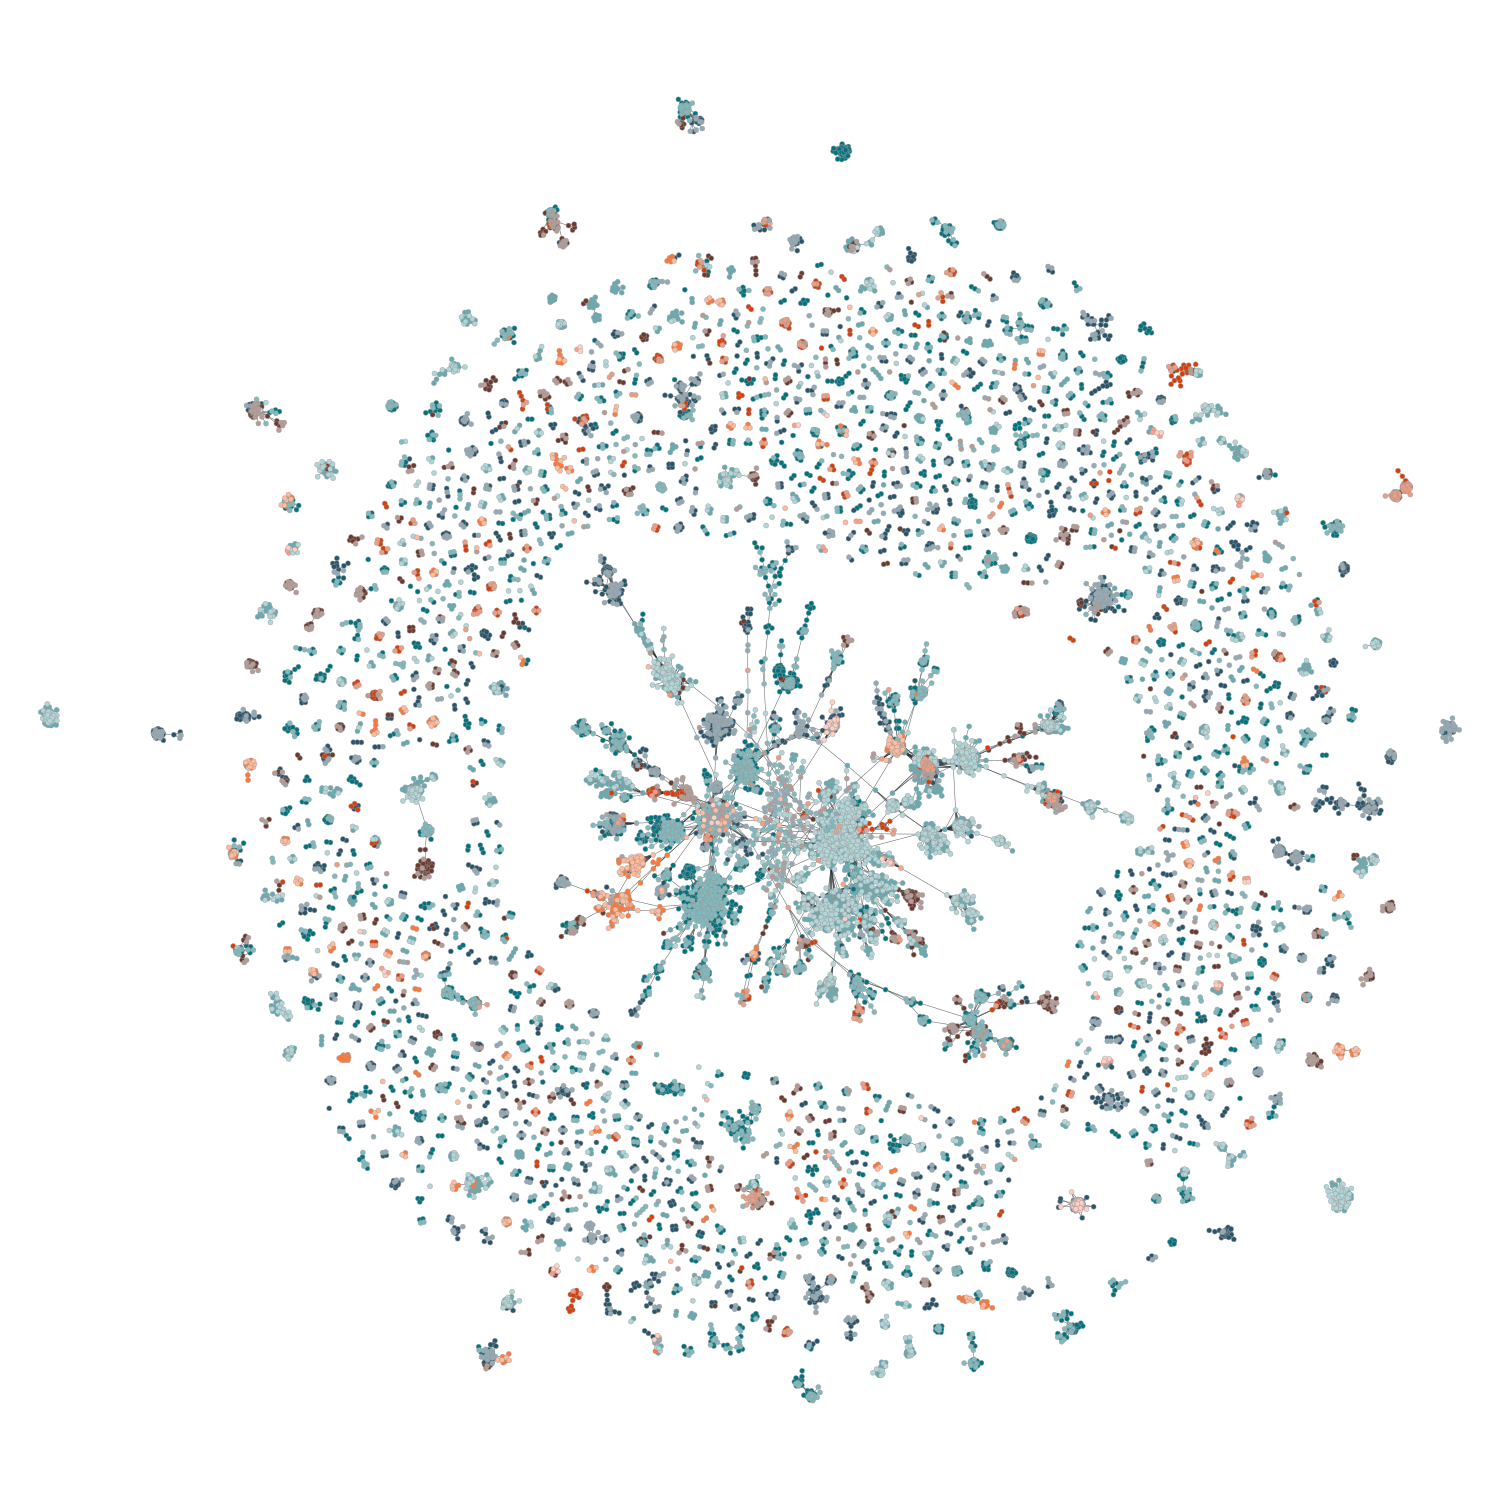

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc6d1422470, at 0x7fc6d142fb70>

In [110]:
graph_draw(g, vertex_fill_color=g.vertex_properties['color'],
           vertex_size=5,output_size=(1500,1500))

In [107]:
g

<Graph object, undirected, with 18557 vertices and 304510 edges at 0x7fc6d1422470>

# Try to do a brenda-clustered plot (>1M).

In [111]:
mmseqs2_results = open('/agh/projects/noelia/NLP/zymCTRL/networks/1.clustering_brenda/alnRes.m8')


In [112]:
total_hits = []
for line in mmseqs2_results:
    query, sbjct, ident, col = line.split()[:4]
    if query == sbjct:
        continue
        
    if float(ident)*100 > get_threshold_identity(col):
        total_hits.append((query, sbjct, ident))
        
mmseqs2_results.close()

In [113]:
len(total_hits)

385562660

In [114]:
unique_hits = np.unique([(x[0],x[1]) for x in total_hits])

In [115]:
len(unique_hits)

1605283

In [ ]:
g = Graph()
g.set_directed(False)
g.vp.name = g.new_vertex_property("string")
g.ep.ident = g.new_edge_property("float")

for vertex in unique_hits:
    v1 = g.add_vertex()
    g.vp.name[v1] = vertex

for hit in total_hits:
    v1 = find_vertex(g, g.vp.name, hit[0])[0]
    v2 = find_vertex(g, g.vp.name, hit[1])[0]
    ae = g.edge(v1, v2)
    if not ae:
        ae = g.add_edge(v1, v2)
        g.ep.ident[ae] = float(hit[2])*100
